# Map Serach



* Example1 BFS(广度优先搜索)

D:\Users\csx\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Users\csx\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Users\csx\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Users\csx\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


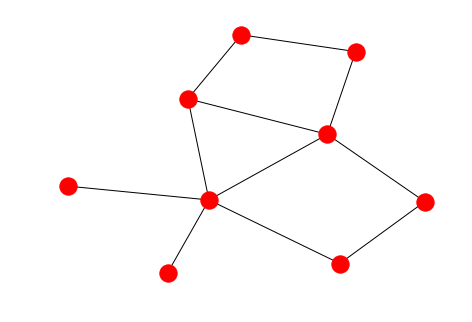

In [2]:
import networkx as nx

'''城市之间的航班通行路线情况'''
CHANGCHUN,BEIJING,WULUMUQI,SHANGHAI,NEWYORK,WUHAN,SHENZHEN,MANGU,GUANGZHOU="""CHANGCHUN BEIJING WULUMUQI SHANGHAI NEWYORK WUHAN 
SHENZHEN MANGU GUANGZHOU""".split()

collection={
    CHANGCHUN:[BEIJING],
    WULUMUQI:[BEIJING],
    BEIJING:[CHANGCHUN,WULUMUQI,NEWYORK,WUHAN,SHENZHEN],
    NEWYORK:[BEIJING,SHANGHAI],
    SHANGHAI:[WUHAN,NEWYORK],
    WUHAN:[BEIJING,GUANGZHOU],
    SHENZHEN:[WUHAN,MANGU],
    GUANGZHOU:[WUHAN,MANGU],
    MANGU:[SHENZHEN,GUANGZHOU]
            
}

%matplotlib inline
nx.draw(nx.Graph(collection))

In [9]:
def navigator(start,destination,collection_graph):
    """
    
    思想：BFS（Breadth First Search，广度优先搜索），最开始很火，但现在的话由于已经很成熟，而且在数据比较大的情况下，serach的情况太多这样的一个固有的缺陷的，
    所以现在不火
    该程序实现在一堆地点中如何选出从A到B的最短路径，限于对数据点比较小的情况，大了的话要考虑的情况太多！,经过多次优化，
    从最开始的路线中出现多个同样的地点，到删除重复重复地点，到记录路线，到得到两点之间对短的路线！
    
    
    """
    pathes=[[start]]   #为啥要两个中括号呢？为后面的pop(0)设定的，即pathes中的元素还是list，pathes是所有可能性路线的集合。
    seen=set()
    
    while pathes:
        path=pathes.pop(0) #始终弹出的是pathes中第一个元素，也即最短的元素，弹出之后，pathes中便会失去该元素！
        frontiers=path[-1] #path中最后一个元素，用来找寻他的下一个位置。
        
        if frontiers in seen: continue  #这一句很重要，因为，在所有的pathes的元素中，
                                        #很有可能出现这样的情况:[A,B,C,A]即路线回来了，所以要排除这样的情况，
                                        #一旦遇到frontoiers于path中其他的元素相同时，则pathes中的第二个元素会赋给path，再重新判断，
                                        #只到frontiers没有在path中出现过。
            
        successors=collection_graph[frontiers] #successors是个List
        for i in successors:
            if i==destination:
                path.append(i)
                return path
            else:
                pathes.append(path+[i])
                
        pathes=sorted(pathes,key=len)  #按长短排序，所以最短的路线会被放到第一个元素的位置。
        
        seen.add(frontiers)   #将frontiers加入到seen中，set添加元素用add
        
        
        
        
def draw_route(route):
    print(' -> '.join(route))
    
draw_route(navigator(WULUMUQI,MANGU,collection)) #navigator返回的是一个元素为str的List。
                


WULUMUQI -> BEIJING -> SHENZHEN -> MANGU


In [7]:
! pip install icecream   #jupyter里居然可以安装包


You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


* Example2 DFS（深度优先搜索），以及BFS和DFS之间的区别

D:\Users\csx\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Users\csx\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Users\csx\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Users\csx\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


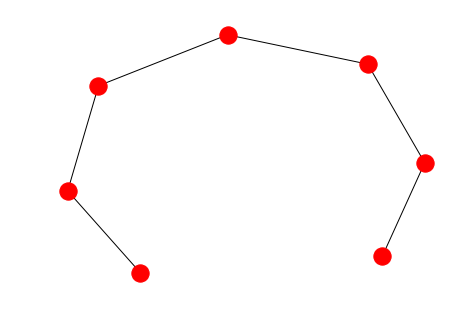

In [21]:
collection_2={
    3:[1,4],
    4:[3,5],
    5:[4,6],
    6:[5,7],
    1:[3,2],
    7:[6],
    2:[1]       
}

nx.draw(nx.Graph(collection_2))


In [37]:
def BFS(start,destination,collection_graph):
    '''
    这次的程序简写了，没有实现最短路径，和路线的记录功能
    
    '''
    
    pathes=[start]
    seen=set()
    
    while pathes:
        frontiers=pathes.pop(0)


        if frontiers in seen: continue

        successors=collection_graph[frontiers]
        print("i'm standing in {},looking forward {}".format(frontiers,successors))
        pathes=pathes+successors   #BFS 和 DFS代码唯一的区别， 看successors加的位置。 BFS先广度，在纵深，DFS反之！ 观察各自的pathes即可发现！
        print(pathes)
        
        seen.add(frontiers)
    
    
BFS(3,7,collection_2)


i'm standing in 3,looking forward [1, 4]
[1, 4]
i'm standing in 1,looking forward [3, 2]
[4, 3, 2]
i'm standing in 4,looking forward [3, 5]
[3, 2, 3, 5]
i'm standing in 2,looking forward [1]
[3, 5, 1]
i'm standing in 5,looking forward [4, 6]
[1, 4, 6]
i'm standing in 6,looking forward [5, 7]
[5, 7]
i'm standing in 7,looking forward [6]
[6]


In [36]:
def DFS(start,destination,collection_graph):
    '''
    这次的程序简写了，没有实现最短路径，和路线的记录功能
    
    '''
    
    pathes=[start]
    seen=set()
    
    while pathes:
        frontiers=pathes.pop(0)


        if frontiers in seen: continue

        successors=collection_graph[frontiers]
        print("i'm standing in {},looking forward {}".format(frontiers,successors))
        pathes=successors+pathes
        print(pathes)
        
        seen.add(frontiers)
    
    
DFS(3,7,collection_2)

i'm standing in 3,looking forward [1, 4]
[1, 4]
i'm standing in 1,looking forward [3, 2]
[3, 2, 4]
i'm standing in 2,looking forward [1]
[1, 4]
i'm standing in 4,looking forward [3, 5]
[3, 5]
i'm standing in 5,looking forward [4, 6]
[4, 6]
i'm standing in 6,looking forward [5, 7]
[5, 7]
i'm standing in 7,looking forward [6]
[6]
